<a href="https://colab.research.google.com/github/prabirdeb/Automated-Question-Answering-System/blob/main/Automated_Question_Answering_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project: Automated Question-Answering**

## <b> Problem Description </b>

### In this project, at first our task is to create a dataset of datascience documents and then extract the topics of the documents and finally build a automated question answering model which will  retrieve the relevant document and generate the answer for the question

# **Exploration and Pre-processing of Data**

This involves following steps to transform raw data into quality data for the deep learning model 

## **1. Connection with the Data**

Here, the dataset is the gist of my learning experiences in Almabetter stored in an excel file.

At first, we import the libraries or functions for **making our journey easy** and then **get connected** to the set of experiences.

In [1]:
# Importing libraries

# Data handling
import numpy as np
import pandas as pd

# machine learning
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.pairwise import cosine_similarity

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline

# Text processing
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import string

import gensim

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
# Importing deep learning libraries

In [3]:
# !pip install streamlit

In [4]:
!pip install transformers

     |████████████████████████████████| 3.8 MB 26.4 MB/s 
     |████████████████████████████████| 895 kB 46.1 MB/s 
     |████████████████████████████████| 596 kB 41.6 MB/s 
     |████████████████████████████████| 6.5 MB 51.2 MB/s 
     |████████████████████████████████| 67 kB 5.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [5]:
from transformers import pipeline
ques_ans_pipeline = pipeline("question-answering")

No model was supplied, defaulted to distilbert-base-cased-distilled-squad (https://huggingface.co/distilbert-base-cased-distilled-squad)


Downloading:   0%|          | 0.00/473 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/249M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

In [6]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 21.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=28d9c1513aa928516f7112b6ecdc780a9aeb1a9fbbf5aea50492460f962f05f7
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [7]:
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Reading the data as pandas dataframe
xls = pd.ExcelFile('/content/drive/MyDrive/Almabetter Assignments/Capstone projects/Automated Question Answering System-Prabir Debnath/data.xlsx')
xls.sheet_names

['Concepts']

In [10]:
data_science_df = pd.read_excel(xls, 'Concepts')

## **2. First Feelings of the Data**

As there is a huge no. of experiences, we cannot see the whole lot of experiences and therefore we find the features on the **data head**.

In [11]:
data_science_df.head(2)

,Concept-1,Concept-2,Concept-3,Concept-4,Concept-5,Concept-6,Concept-7,Concept-8,Concept-9,Concept-10,...,Concept-12,Concept-13,Concept-14,Concept-15,Concept-16,Concept-17,Concept-18,Concept-19,Concept-20,Unnamed: 20
0,python tokens\n\nLike any other computer progr...,There are 32 keywords in C++ and 35 keywords i...,"python data types (Numeric, Boolean, String, D...","Arithmatic Operation\n\n(addition[+], subtract...","In mathematics and computer science, the floor...",\nThe ceiling function maps x to the least int...,Variable is the storing place in computer memo...,NaN,commenting multiple lines in colab\n\nCtrl + /,"Perfect number, a positive integer that is equ...",...,To get the absolute value\n\nabs(5.8-7.8) retu...,The del keyword in python is primarily used to...,order of precedence in python\n\ni) Parenthese...,int(True) gives result 1 and int(False) gives 0,An application or app or software or model is ...,"a += 2 means first add 2 with ""a"" and then sav...","Four basic answers of any question\n\nyes, no,...",\nlogical resoning\n\nStatement: Is buying thi...,The pprint module provides a capability to “pr...,NaN
1,"String is a word, a phrase, a sentence, a para...",NaN,NaN,to print a new line\n\nprint('Use \n to print ...,for color print\n\nfrom termcolor import color...,Grabbing the element by index \n\nprint(string...,"String Slicing, \n\n[starting index:ending ind...",NaN,NaN,NaN,...,"String functions\n\nprint(), type(), len()\n\n...","String methods \n\nstring.lower(), string.uppe...",way to embed expressions inside string litera...,my_string = 'Albert Einstein' \n\n'Albert' i...,String duplication occurs when we multiply str...,Taking user's input\n\ninputted_number = int(i...,\n\nA string can be called a safe bridge if it...,NaN,String matching\n\nimport re\n pattern = re.co...,NaN


## **3. Deeper Understanding of the Data**

As there is a huge no. of experiences, we take the help of **statistics to measure** each and every features in different dimensions.

In [12]:
data_science_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Concept-1    99 non-null     object
 1   Concept-2    81 non-null     object
 2   Concept-3    77 non-null     object
 3   Concept-4    88 non-null     object
 4   Concept-5    83 non-null     object
 5   Concept-6    85 non-null     object
 6   Concept-7    77 non-null     object
 7   Concept-8    81 non-null     object
 8   Concept-9    77 non-null     object
 9   Concept-10   74 non-null     object
 10  Concept-11   73 non-null     object
 11  Concept-12   70 non-null     object
 12  Concept-13   69 non-null     object
 13  Concept-14   63 non-null     object
 14  Concept-15   59 non-null     object
 15  Concept-16   48 non-null     object
 16  Concept-17   44 non-null     object
 17  Concept-18   44 non-null     object
 18  Concept-19   37 non-null     object
 19  Concept-20   29 non-null     ob

## **4. Cleaning the Data**

In this step, we treat null, missing, "?" or duplicate values.

We check the statistics further on clean data.

Creating Dataset with Relevant Features

In [13]:
relevant_features=['Concept-1', 'Concept-2', 'Concept-3', 'Concept-4', 'Concept-5',
       'Concept-6', 'Concept-7', 'Concept-8', 'Concept-9', 'Concept-10',
       'Concept-11', 'Concept-12', 'Concept-13', 'Concept-14', 'Concept-15',
       'Concept-16', 'Concept-17', 'Concept-18', 'Concept-19', 'Concept-20']

In [14]:
data_science_df_clean=data_science_df[relevant_features]

In [15]:
# Creating documents with all individual cell
data_science_df_clean=pd.DataFrame(data_science_df_clean.values.flatten(), columns=['documents'])
data_science_df_clean.head(2)

,documents
0,python tokens\n\nLike any other computer progr...
1,There are 32 keywords in C++ and 35 keywords i...


In [16]:
# Removing null value rows
data_science_df_clean.dropna(inplace=True) 

In [17]:
data_science_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1979
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   documents  1358 non-null   object
dtypes: object(1)
memory usage: 21.2+ KB


In [18]:
data_science_df_clean['documents']

0       python tokens\n\nLike any other computer progr...
1       There are 32 keywords in C++ and 35 keywords i...
2       python data types (Numeric, Boolean, String, D...
3       Arithmatic Operation\n\n(addition[+], subtract...
4       In mathematics and computer science, the floor...
                              ...                        
1972    Knowledge of data science to understand human ...
1973                                                   \n
1977                                                   \n
1978                                                 \n\n
1979    Help Lines\n\n> I am the 'tell_me' model. I ha...
Name: documents, Length: 1358, dtype: object

In [19]:
# There are many documents with only newline character. Removing those rows
data_science_df_clean=data_science_df_clean[(data_science_df_clean['documents']!='\n')]
data_science_df_clean=data_science_df_clean[(data_science_df_clean['documents']!='\n\n')]

In [20]:
# Checking no data in any row
data_science_df_clean[(data_science_df_clean['documents']=='No data')]

,documents
480,No data
1300,No data
1320,No data
1420,No data


In [21]:
# Removing all the rows with no data and reseting index 
data_science_df_clean=data_science_df_clean[(data_science_df_clean['documents']!='No data')].reset_index()

In [22]:
data_science_df_clean.drop('index',axis=1, inplace=True)

In [23]:
data_science_df_clean['documents']

0       python tokens\n\nLike any other computer progr...
1       There are 32 keywords in C++ and 35 keywords i...
2       python data types (Numeric, Boolean, String, D...
3       Arithmatic Operation\n\n(addition[+], subtract...
4       In mathematics and computer science, the floor...
                              ...                        
1327    Audio data: speech recognition\n\nThis is a se...
1328    Basic Rule of CTC based technique\n\nCollapse ...
1329    Audio Data: Trigger word detection\n\ne.g. Ale...
1330    Knowledge of data science to understand human ...
1331    Help Lines\n\n> I am the 'tell_me' model. I ha...
Name: documents, Length: 1332, dtype: object

In [24]:
# abbreviations used
# ' ml '=' machine learning '
# ' cnn '=' convolutional neural network '
# ' rnn '=' recurrent neural network '
# ' Sequence Models '=' recurrent neural network '
# ' pca '=' principal component analysis '
# ' svm '=' support vector machine '
# ' knn '=' k-nearest neighbors '
# ' ann '=' artificial neural network '
# ' nn '=' neural network '
# ' sgd '=' stochastic gradient descent '
# ' gd '=' gradient descent '
# ' nlp '=' natural language processing '
# ' nlu '=' natural language understanding '
# ' api '= ' application programming interface '
# ' gui '=' graphical user interface '
# ' mlops '= ' ml lifecycle '
# ' lda '=' latent dirichlet allocation '
# ' svd '=' singular value decomposition '
# ' cf '=' collaborative filtering '
# ' cpu '=' central processing unit '
# ' anova '=' analysis of variance '
# ' auc '=' area under the curve '
# ' cv '=' cross validation '
# ' dnn '=' deep neural network ' 
# ' eda '=' exploratory data analysis '
# ' gbm '=' gradient boosting machine '
# ' glm '=' generalized linear model '
# ' gru '=' gated recurrent unit '
# ' hmm '=' hidden marcov model '
# ' ica '=' independent component analysis '
# ' lstm '=' long short term memory '
# ' mape '=' mean absolute percentage error '
# ' mse '=' mean squared error '
# ' rmse '=' root mean squared error '
# ' nldr '=' non-linear dimensionality reduction '
# ' r2 '=' r-squared '
# ' rf '=' random forest '
# ' roc '=' receiver operating characteristic '

Text Pre-processing

In [25]:
# writing abbreviation processing function
def abbreviation_process(text):
    abbreviation_dict= {'ml':'machine learning','cnn':'convolutional neural network',
                        'rnn':'recurrent neural network','Sequence Models':'recurrent neural network',
                        'pca':'principal component analysis','svm':'support vector machine',
                        'knn':'k-nearest neighbors','ann':'artificial neural network',
                        'nn':'neural network','sgd':'stochastic gradient descent',
                        'gd':'gradient descent','nlp':'natural language processing',
                        'nlu':'natural language understanding','api': 'application programming interface',
                        'gui':'graphical user interface','mlops': 'ml lifecycle',
                        'lda':'latent dirichlet allocation','svd':'singular value decomposition',
                        'cf':'collaborative filtering','cpu':'central processing unit',
                        'anova':'analysis of variance','auc':'area under the curve',
                        'cv':'cross validation','dnn':'deep neural network',
                        'eda':'exploratory data analysis','gbm':'gradient boosting machine',
                        'glm':'generalized linear model','gru':'gated recurrent unit',
                        'hmm':'hidden marcov model','ica':'independent component analysis',
                        'lstm':'long short term memory','mape':'mean absolute percentage error',
                        'mse':'mean squared error','rmse':'root mean squared error',
                        'nldr':'non-linear dimensionality reduction','r2':'r-squared',
                        'rf':'random forest','roc':'receiver operating characteristic',
                        'ai':'artificial intelligence'}
                        
    text = text.lower()    # converting to lowercase
    text= text.replace('?','') # removing '?' mark

    for k in text.split():   # loop for replacing the abbreviations
      for i in abbreviation_dict.keys():
        if k==i:
          text=text.replace(k,abbreviation_dict.get(i))
  
    return text

In [26]:
abbreviation_process('CPU meaning?')

'central processing unit meaning'

In [27]:
# writing text pre-processing function
def text_process(text):
    text = text.lower()    # converting to lowercase
    text =[char for char in text if char not in string.punctuation] # removing punctuations
    text=''.join(text) 
    text=[word for word in text.split() if word not in stopwords.words('english')]  # removing stopwords
    stemmer = SnowballStemmer("english") 
    text=' '.join(text) 
    text = [stemmer.stem(word) for word in text.split()] # stemming operation
    return ' '.join(text)

In [28]:
text_process('I am Running in the field')

'run field'

In [29]:
# Wrting top words function
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_documents = count_vectorizer.fit_transform(text_data.apply(abbreviation_process).apply(text_process).values) # also performing text  and abbreviation processing
    vectorized_total = np.sum(vectorized_documents, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_documents.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

Let's develop a list of the top words used across the documents, which gives us a glimpse into the core vocabulary of the source data. Stop words are omitted here to avoid any trivial conjunctions, prepositions, etc.

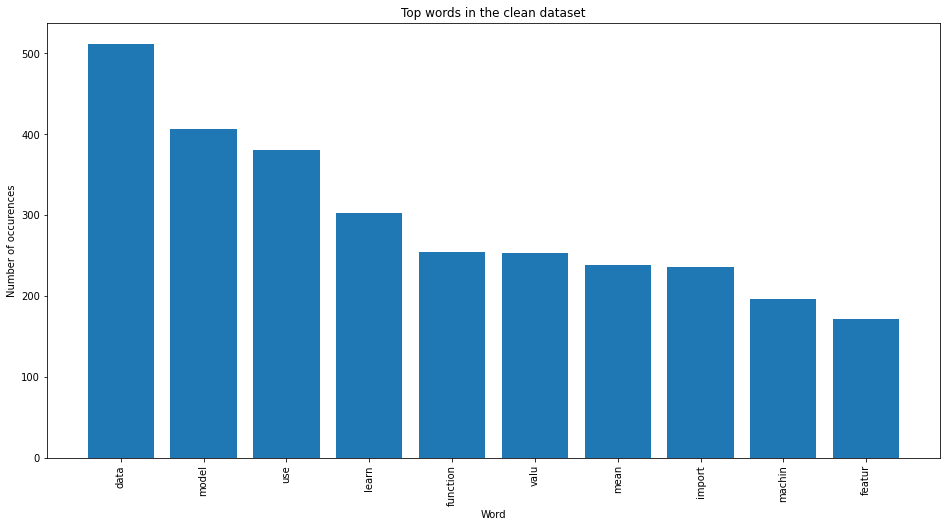

In [30]:
# Ploting top words in the entire dataset
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=10,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=data_science_df_clean['documents'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in the clean dataset')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

## **5. Preparation of Input Data**

In [31]:
# Document processing
data_science_df_clean['documents_processed'] = data_science_df_clean['documents'].apply(abbreviation_process).apply(text_process)
# Considering first 50 letters as the main concept of the document
data_science_df_clean['documents_processed'] = [k[:50] for k in data_science_df_clean.documents_processed] 
# Document tokens
data_science_df_clean['document_tokens']=[k.split() for k in data_science_df_clean.documents_processed]
# Creating new column for first 100 letters
data_science_df_clean['first_100_letters']= [k[:100] for k in data_science_df_clean['documents'].apply(abbreviation_process)] 

In [32]:
data_science_df_clean.head(2)

,documents,documents_processed,document_tokens,first_100_letters
0,python tokens\n\nLike any other computer progr...,python token like comput program languag pytho...,"[python, token, like, comput, program, languag...",python tokens\n\nlike any other computer progr...
1,There are 32 keywords in C++ and 35 keywords i...,32 keyword c 35 keyword python python keyword ...,"[32, keyword, c, 35, keyword, python, python, ...",there are 32 keywords in c++ and 35 keywords i...


New line character must be removed from first_100_letters column

# **Building of Topic Model**

In [33]:
# vectorization of documents
count_vectorizer = CountVectorizer(stop_words='english', max_features=4000)

text_sample = data_science_df_clean.documents_processed.values

print('Document before vectorization: {}'.format(text_sample[0]))

document_term_matrix = count_vectorizer.fit_transform(text_sample)

print('Document after vectorization: \n{}'.format(document_term_matrix[0]))

Document before vectorization: python token like comput program languag python to
Document after vectorization: 
  (0, 1848)	2
  (0, 2353)	1
  (0, 1300)	1
  (0, 469)	1
  (0, 1814)	1
  (0, 1254)	1


Building LDA model with sklearn and hyperparameter tuning

In [34]:
lda = LatentDirichletAllocation()

grid_params={'n_components': list(range(5,10)), 'learning_decay': [.5, .7, .9]}

lda_model = GridSearchCV(lda,param_grid=grid_params)

lda_model.fit(document_term_matrix)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [5, 6, 7, 8, 9]})

Let's see the best topic model and its parameters

In [35]:
# Best Model
best_lda_model = lda_model.best_estimator_

# Model Parameters
print("Best Model's Params: ", lda_model.best_params_)

# Perplexity
print("Model Perplexity: ", round(best_lda_model.perplexity(document_term_matrix),2))

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 5}
Model Perplexity:  2164.44


Let's visualize the LDA model with pyLDAvis

In [36]:
lda_panel = pyLDAvis.sklearn.prepare(best_lda_model, document_term_matrix,count_vectorizer,mds='tsne')
lda_panel

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distan

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0      150.222153  -72.269554       1        1  21.502089
3       51.163364 -159.968018       2        1  21.445170
2      -73.144554   21.523815       3        1  20.047310
1      -66.410133 -110.606438       4        1  19.274902
4       54.417324   12.443444       5        1  17.730530, topic_info=          Term       Freq       Total Category  logprob  loglift
1275     learn  79.000000   79.000000  Default  30.0000  30.0000
1385    matrix  39.000000   39.000000  Default  29.0000  29.0000
2255    subtop  57.000000   57.000000  Default  28.0000  28.0000
1536   network  44.000000   44.000000  Default  27.0000  27.0000
1927   regress  31.000000   31.000000  Default  26.0000  26.0000
...        ...        ...         ...      ...      ...      ...
583       data  10.197773  117.323316   Topic5  -5.0725  -0.7129
936   function   7.346241   46.670231   Topic5  -5.4005  -0.1190
2513       way   6.005759   21.802903   Topic5  -5.6020   0.4406
1466   multipl   6.183544   29.672714   Topic5  -5.5728   0.1615
2462      valu   5.930748   37.460585   Topic5  -5.6145  -0.1133

[326 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
86        1  0.953184     accur
129       1  0.845718   airflow
137       5  0.910031   algebra
152       2  0.958670  anaconda
156       1  0.502427   analysi
...     ...       ...       ...
2534      2  0.343897      word
2534      3  0.196513      word
2534      5  0.147385      word
2577      1  0.762042      yolo
2593      1  0.953184        σ1

[506 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 2, 5])

Let's see the dominant topic in each document

In [37]:
# Create Document - Topic Matrix
lda_output = best_lda_model.transform(document_term_matrix) # Takes word presence embeding as input and gives contextual embedding as output

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(data_science_df_clean['documents']))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
Doc0,0.710000,0.220000,0.030000,0.030000,0.030000,0
Doc1,0.020000,0.910000,0.020000,0.020000,0.020000,1
Doc2,0.020000,0.020000,0.020000,0.020000,0.910000,4
Doc3,0.900000,0.030000,0.030000,0.030000,0.030000,0
Doc4,0.500000,0.030000,0.030000,0.430000,0.030000,0
Doc5,0.030000,0.890000,0.030000,0.030000,0.030000,1
Doc6,0.600000,0.020000,0.020000,0.020000,0.330000,0
Doc7,0.030000,0.030000,0.860000,0.030000,0.030000,2
Doc8,0.020000,0.910000,0.020000,0.020000,0.020000,1
Doc9,0.890000,0.030000,0.030000,0.030000,0.030000,0


Review topics distribution across documents

In [38]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,3,297
1,0,294
2,2,265
3,1,249
4,4,227


Let's see the Topic’s keywords

In [39]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = count_vectorizer.get_feature_names()
df_topic_keywords.index = topicnames

# View
df_topic_keywords.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,001z,05,10,100,10k,123n,12c,150,1530,16,...,zscore,zwtransposexb,zx,zypr,βweig,γα,σ1,σ2,σytest,σyw0w1x1w2x2w3x3wnxn2
Topic0,0.200004,1.199978,0.200014,1.199419,1.199979,0.200006,0.200006,0.200005,0.200004,0.200004,...,1.199976,0.200006,0.200004,0.200004,0.200004,0.200007,3.199984,4.205553,0.200006,0.200006
Topic1,0.200005,0.200006,1.199265,0.200011,0.200005,0.200006,0.200006,1.199980,0.200006,0.200005,...,0.200006,0.200006,1.199982,1.199982,0.200004,0.200006,0.200004,1.191561,0.200007,0.200007
Topic2,1.199982,0.200005,2.202722,0.200010,0.200005,0.200005,1.198348,0.200005,0.200005,1.199982,...,0.200006,1.198886,0.200004,0.200004,0.200004,0.200006,0.200004,0.200012,0.200006,0.200006
Topic3,0.200004,0.200005,0.200015,0.200010,0.200005,0.200005,0.200005,0.200005,0.200005,0.200004,...,0.200006,0.200006,0.200004,0.200004,0.200004,1.199975,0.200004,0.200011,1.199973,1.199973
Topic4,0.200005,0.200006,1.197985,1.200549,0.200006,1.199978,0.201635,0.200006,1.199980,0.200005,...,0.200006,0.201095,0.200005,0.200005,1.199984,0.200006,0.200004,0.202864,0.200007,0.200007


Get the top 15 keywords each topic

In [40]:
# Show top n keywords for each topic
def show_topics(vectorizer=count_vectorizer, lda_model=best_lda_model, n_words=15):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=count_vectorizer, lda_model=best_lda_model, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,data,model,import,applic,code,sampl,test,set,program,mean,use,error,comput,hypothesi,confid
Topic 1,regress,linear,number,function,data,decis,compon,line,tree,git,similar,analysi,problem,docker,featur
Topic 2,network,distribut,neural,use,mean,probabl,data,import,process,languag,model,layer,learn,machin,classif
Topic 3,learn,subtop,machin,model,data,use,function,valu,column,panda,deep,import,tabl,python,gradient
Topic 4,matrix,random,variabl,vector,time,list,use,seri,import,method,techniqu,model,data,file,valid


# **Checking general answering ability of 'question-answering' model**

In [41]:
question='what is the daily task of a data scientist?'
context='the task of human being is to be honest.'
ans = ques_ans_pipeline(question=question, context=context)
print(ans)

{'score': 0.5999396443367004, 'start': 33, 'end': 39, 'answer': 'honest'}


In [42]:
question='what is the daily task of a data scientist'
context='the role of data scientist is to analyse data.'
ans = ques_ans_pipeline(question=question, context=context)
print(ans)

{'score': 0.485635370016098, 'start': 30, 'end': 45, 'answer': 'to analyse data'}


Thus, bad question, context pair gives bad result by 'question-answering' model 

# **Building of Question-Answering Model-1**

CountVec and Question-Answering Model

In [56]:
# Writing a function for question answering
def tell_me1(question):
  '''
  This model gives answer to data science related questions.
  '''
  global data_science_df_clean
  
  # Processing the question
  question_abbre_processed =abbreviation_process(question)
  question_processed = text_process(question_abbre_processed)
    
  # Appending question in the dataset to match the dimension of question and document vector
  data_science_df_clean=data_science_df_clean[(data_science_df_clean.documents!=data_science_df_clean.documents_processed)]
  data_science_df_clean.loc[(data_science_df_clean.index.max()+1)] = question_processed

  # vectorization of text samples
  count_vectorizer_model = CountVectorizer(stop_words='english', max_features=4000) # Downloading pre-trained vectorization model (CountVectorizer)
  document_term_matrix = count_vectorizer_model.fit_transform(data_science_df_clean.documents_processed.values)

  # CountVec question-answering model
  topic_match=[]
  short_answer_dict={}
  long_answer_dict={}
  
  vec_1=document_term_matrix[-1:]     # Question vector

  for k in range(len(data_science_df_clean.documents[:-1])):
    vec_2=document_term_matrix[k:(k+1)]     # Individual document vector
    topic_match.append(cosine_similarity(vec_1 , vec_2)[0][0])
    
  try:
    
    if max(topic_match)<0.3:  # Deciding the margins through hit and trial for perfect answer
      answer=print("Sorry ! I have no experience for this question.")
              
    else:
      for i in topic_match:
        if i>0.7*max(topic_match): # Deciding the margins through hit and trial for perfect answer
          context=data_science_df_clean.first_100_letters[topic_match.index(i)]
          ans = ques_ans_pipeline(question=question_abbre_processed, context=context)
          short_answer_dict[ans['score']] =ans['answer']
          long_answer_dict[ans['score']]=data_science_df_clean.documents[topic_match.index(i)]
                  
      if max(list(short_answer_dict.keys()))>0.01: # Deciding the margins through hit and trial for perfect answer
        answer=print(long_answer_dict.get(max(list(long_answer_dict.keys()))))
                        
      else:
        answer=print("Sorry ! I have no experience for this question.")
        
  except:
    answer=print("There is an exception")
    
  return answer, print("\nBEGINNER MAY TYPE 'HELP LINES'")

In [57]:
tell_me1("help lines")

Help Lines

> I am the 'tell_me' model. I have many experiences to share with data science aspirants.

> Data science consists of a few subjects, subjects again comprised of modules, each module consist of a few topics and each topic is included subtopics

> Fresher may start with the following question

"What are the main subjects of data science?"



BEGINNER MAY TYPE 'HELP LINES'


(None, None)

# **Building of Question-Answering Model-2**

TFIDF and Question-Answering Model

In [45]:
# Writing a function for question answering
def tell_me2(question):
  '''
  This model gives answer to data science related questions.
  '''
  global data_science_df_clean
  
  # Processing the question
  question_abbre_processed =abbreviation_process(question)
  question_processed = text_process(question_abbre_processed)
    
  # Appending question in the dataset to match the dimension of question and document vector
  data_science_df_clean=data_science_df_clean[(data_science_df_clean.documents!=data_science_df_clean.documents_processed)]
  data_science_df_clean.loc[(data_science_df_clean.index.max()+1)] = question_processed

  # vectorization of text samples
  tfidf_vectorizer = TfidfVectorizer(max_df = 0.9,min_df = 10)
  document_tfidf_matrix=tfidf_vectorizer.fit_transform(data_science_df_clean.documents_processed.values)

  # tfidf question-answering model
  topic_match=[]
  short_answer_dict={}
  long_answer_dict={}
  vec_1=document_tfidf_matrix[-1:]     # Question vector

  for k in range(len(data_science_df_clean.documents[:-1])):
    vec_2=document_tfidf_matrix[k:(k+1)]     # Individual document vector
    topic_match.append(cosine_similarity(vec_1 , vec_2)[0][0])
    
  try:
    
    if max(topic_match)<0.3:    # Deciding the margins through hit and trial for perfect answer
      answer=print("Sorry ! I have no experience for this question.")
              
    else:
      for i in topic_match:
        if i>0.7*max(topic_match): # Deciding the margins through hit and trial for perfect answer
          context=data_science_df_clean.first_100_letters[topic_match.index(i)]
          ans = ques_ans_pipeline(question=question_abbre_processed, context=context)
          short_answer_dict[ans['score']] =ans['answer']
          long_answer_dict[ans['score']]=data_science_df_clean.documents[topic_match.index(i)]
                  
      if max(list(short_answer_dict.keys()))>0.01: # Deciding the margins through hit and trial for perfect answer
        answer=print(long_answer_dict.get(max(list(long_answer_dict.keys()))))
                      
      else:
        answer=print("Sorry ! I have no experience for this question.")
          
  except:
    answer=print("There is an exception")
      
  return answer, print("\nBEGINNER MAY TYPE 'HELP LINES'")

In [58]:
tell_me2("help lines")

Loops help us to execute a block of code repeatedly
BEGINNER MAY TYPE 'HELP'


(None, None)

# **Building of Question-Answering Model-3**

LDA and Question-Answering Model

In [59]:
# Writing a function for question answering
def tell_me3(question):
  '''
  This model gives answer to data science related questions.
  '''
  global data_science_df_clean
  
  # Processing the question
  question_abbre_processed =abbreviation_process(question)
  question_processed = text_process(question_abbre_processed)
    
  # Appending question in the dataset to match the dimension of question and document vector
  data_science_df_clean=data_science_df_clean[(data_science_df_clean.documents!=data_science_df_clean.documents_processed)]
  data_science_df_clean.loc[(data_science_df_clean.index.max()+1)] = question_processed

  # vectorization of text samples
  document_lda_matrix=best_lda_model.transform(document_term_matrix)

  # LDA question-answering model
  topic_match=[]
  short_answer_dict={}
  long_answer_dict={}
  vec_1=document_lda_matrix[-1:]     # Question vector

  for k in range(len(data_science_df_clean.documents[:-1])):
    vec_2=document_lda_matrix[k:(k+1)]     # Individual document vector
    topic_match.append(cosine_similarity(vec_1 , vec_2)[0][0])
    
  try:
    
    if max(topic_match)<0.3:  # Deciding the margins through hit and trial for perfect answer
      answer=print("Sorry ! I have no experience for this question.")
              
    else:
      for i in topic_match:
        if i>0.7*max(topic_match): # Deciding the margins through hit and trial for perfect answer
          context=data_science_df_clean.first_100_letters[topic_match.index(i)]
          ans = ques_ans_pipeline(question=question_abbre_processed, context=context)
          short_answer_dict[ans['score']] =ans['answer']
          long_answer_dict[ans['score']]=data_science_df_clean.documents[topic_match.index(i)]
                  
      if max(list(short_answer_dict.keys()))>0.01: # Deciding the margins through hit and trial for perfect answer
        answer=print(long_answer_dict.get(max(list(long_answer_dict.keys()))))
                        
      else:
        answer=print("Sorry ! I have no experience for this question.")
            
  except:
    answer=print("There is an exception")
          
  return answer, print("\nBEGINNER MAY TYPE 'HELP LINES'")

In [60]:
tell_me3("help lines")

For finding single bounding box

3. Non-max supression

When there are multiple bounding boxes for same object, then this algorithm ignores the non-max bounding boxes (probabillity of less than maximum).

> Finally we get non-max supressed output

BEGINNER MAY TYPE 'HELP LINES'


(None, None)

# **Building of Question-Answering Model-4**

Word2Vec and Question-Answering Model

In [54]:
# Writing a function for question answering
def tell_me4(question):
  '''
  This model gives answer to data science related questions.
  '''
  global data_science_df_clean
  
  # Processing the question
  question_abbre_processed =abbreviation_process(question)
  question_processed = text_process(question_abbre_processed).split()  # Tokenizing the question
    
  # Appending question in the dataset to match the dimension of question and document vector
  data_science_df_clean=data_science_df_clean[(data_science_df_clean.documents!=data_science_df_clean.documents_processed)]
  data_science_df_clean.loc[(data_science_df_clean.index.max()+1)] = [question_processed, question_processed, question_processed, question_processed]

  # vectorization of text samples
  w2v_model=gensim.models.Word2Vec(workers=4, min_count=1, window=5)
  w2v_model.build_vocab(data_science_df_clean.document_tokens, progress_per=1000)
  w2v_model.train(data_science_df_clean.document_tokens, total_examples=w2v_model.corpus_count, epochs=w2v_model.epochs)
  
  # Word2Vec question-answering model
  topic_match=[]
  short_answer_dict={}
  long_answer_dict={}
  
  vec_1=vec_1=w2v_model[data_science_df_clean.document_tokens[data_science_df_clean.index.max()]]     # Question vector

  for k in range(len(data_science_df_clean.documents[:data_science_df_clean.index.max()])):
    vec_2=w2v_model[data_science_df_clean.document_tokens[k]]     # Individual document vector
    topic_match.append(cosine_similarity(vec_1 , vec_2)[0][0])
    
  try:
    
    if max(topic_match)<0.3:  # Deciding the margins through hit and trial for perfect answer
      answer=print("Sorry ! I have no experience for this question.")
              
    else:
      for i in topic_match:
        if i>0.7*max(topic_match): # Deciding the margins through hit and trial for perfect answer
          context=data_science_df_clean.first_100_letters[topic_match.index(i)]
          ans = ques_ans_pipeline(question=question_abbre_processed, context=context)
          short_answer_dict[ans['score']] =ans['answer']
          long_answer_dict[ans['score']]=data_science_df_clean.documents[topic_match.index(i)]
                  
      if max(list(short_answer_dict.keys()))>0.01: # Deciding the margins through hit and trial for perfect answer
        answer=print(long_answer_dict.get(max(list(long_answer_dict.keys()))))
                        
      else:
        answer=print("Sorry ! I have no experience for this question.")
        
  except:
    answer=print("There is an exception")
    
  return answer, print("\nBEGINNER MAY TYPE 'HELP LINES'")

In [62]:
tell_me4('help lines')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py

Help Lines

> I am the 'tell_me' model. I have many experiences to share with data science aspirants.

> Data science consists of a few subjects, subjects again comprised of modules, each module consist of a few topics and each topic is included subtopics

> Fresher may start with the following question

"What are the main subjects of data science?"



BEGINNER MAY TYPE 'HELP'


(None, None)

# **Conclusion**

Here, countvec question-answering model is giving better answer than tfidf model

Here, countvec question-answering model is also giving better answer than lda model. countvec model is also much faster than lda model.

Here, countvec and word2vec are giving same answer in most of the cases. But countvec question-answering model is better than word2vec model with respect to time and maximum answering ability.

In [51]:
# import streamlit as st
# from transformers import pipeline

# @st.cache(allow_output_mutation=True)
# def load_qa_model():
#     model = pipeline("question-answering")
#     return model

# qa = load_qa_model()
# st.title("Ask Questions about your Text")
# sentence = st.text_area('Please paste your article :', height=30)
# question = st.text_input("Questions from this article?")
# button = st.button("Get me Answers")
# max = st.sidebar.slider('Select max', 50, 500, step=10, value=150)
# min = st.sidebar.slider('Select min', 10, 450, step=10, value=50)
# do_sample = st.sidebar.checkbox("Do sample", value=False)
# with st.spinner("Discovering Answers.."):
#     if button and sentence:
#         answers = qa(question=question, context=sentence)
#         st.write(answers['answer'])